# Preparation

Este é o primeiro passo do nosso trabalho, no qual exploramos o dataset e as bibliotecas que iremos usar, bem como as suas funções e as features que podemos extrair.<br>
Por fim, com base nas capacidades de cada modelo sugerido e nas ferramentas ao nosso dispor, iremos decidir os modelos a usar.

Este notebook está dividido nas seguinte partes:
- 0. Libraries
- 1. Dataset
- 2. Soundata
- 3. Librosa
- 4. Seleção dos Modelos

# 

# 0. Libraries

In [9]:
import librosa as lr
import soundata as sd

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 

# 1. Dataset

O dataset inclui um ficheiro ".csv" que possui informação relativa aos audios. É nos dada a seguinte informação relevante:
- "slice_file_name": nome do ficheiro audio;
- "salience": destaque do som analisado no audio;
- "fold": fold a qual o audio pertence;
- "class": classe do audio.

In [10]:
#definir diretorio do ficheiro de metadata e visualizar
metadata_path = "/home/miguel/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv"
metadata_df = pd.read_csv(metadata_path)
metadata_df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


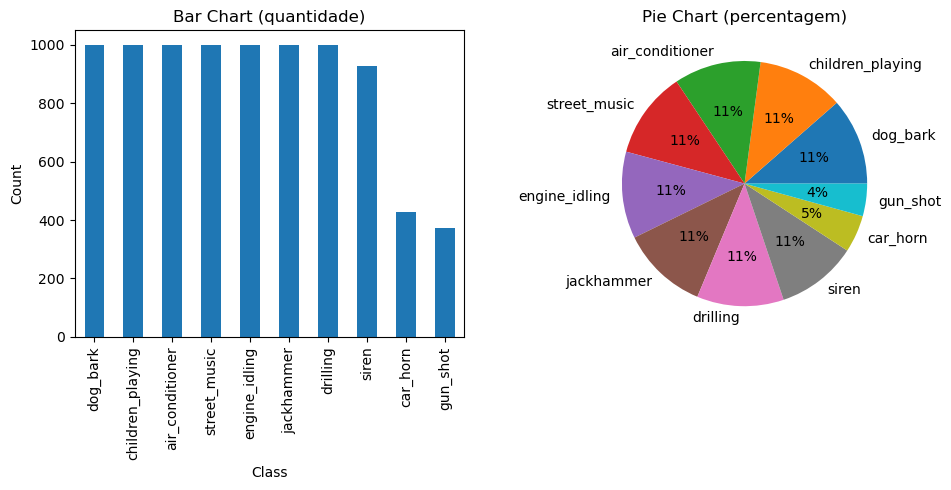

In [11]:
#plot de graficos relativos as classes (bar e pie)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#bar chart
metadata_df['class'].value_counts().plot(
    kind='bar', 
    ax=axes[0], 
    figsize=(10, 5),
    title="Bar Chart"
)
axes[0].set_title("Bar Chart (quantidade)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")


#pie chart
metadata_df['class'].value_counts().plot(
    kind='pie', 
    ax=axes[1], 
    autopct='%1.0f%%', 
    figsize=(10, 5),
    title="Pie Chart"
)
axes[1].set_title("Pie Chart (percentagem)")
axes[1].set_ylabel("")

#mostrar
plt.tight_layout()
plt.show()

Através da análise destes dois gráficos, podemos concluir que os dados que nos são fornecidos encontram-se, de modo geral, bem balanceados. Existe, no entanto, uma pequena descrepância entre a percentagem de audios "car_horn" (5%) e "gun_shot" (4%), comparativamente com o resto (11% cada um dos audios restantes).<br>
Todavia, esta diferença não deverá afetar muito a performance final dos nossos modelos.

# 

# 2. Soundata

Biblioteca usada para aceder a datasets (no nosso caso, urbansound8k), obtendo informações sobre os mesmos (ids, clips, anotações, ...).

In [12]:
#iniciar o dataset
dataset = sd.initialize('urbansound8k')

In [13]:
#download do dataset
#remover "#" da linha seguinte quando se executa a primeira vez este notebook
#dataset.download(force_overwrite=True)

In [14]:
#verificar a presença de todos os ficheiros necessários
dataset.validate()

100%|██████████████████████████████████████| 8732/8732 [00:12<00:00, 693.57it/s]
INFO: Success: the dataset is complete and all files are valid.
INFO: --------------------


({'metadata': {}, 'clips': {}}, {'metadata': {}, 'clips': {}})

In [15]:
#lista de ids do dataset
ids = dataset.clip_ids
len(ids)

8732

In [16]:
#carregar os clips do dataset
clips = dataset.load_clips()
for key, clip in clips.items():
    print(key, "\n", clip.audio_path, "\n")

135776-2-0-49 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/135776-2-0-49.wav 

46654-6-0-0 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/46654-6-0-0.wav 

57320-0-0-24 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/57320-0-0-24.wav 

134717-0-0-26 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/134717-0-0-26.wav 

174276-7-5-0 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/174276-7-5-0.wav 

180937-7-2-6 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/180937-7-2-6.wav 

17913-4-0-1 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/17913-4-0-1.wav 

103074-7-4-6 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/103074-7-4-6.wav 

176787-5-0-9 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/176787-5-0-9.wav 

55020-4-0-11 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/55020-4-0-11.wav 

138015-3-0-7 
 /home/miguel/sound_datasets/urbansound8k/audio/fold1/138015-3-0-7.wav 

180937-7-0-4 
 /home/miguel/sound_datasets/

In [17]:
#carregar clip de exemplo
exemplo = dataset.clip("138015-3-0-7") 
exemplo

Clip(
  audio_path="/home/miguel/sound_datasets/urbansound8k/audio/fold1/138015-3-0-7.wav",
  clip_id="138015-3-0-7",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_

In [18]:
#obter anotacoes do exemplo
tags = exemplo.tags
print(tags)
print("\nConfidence: ", tags.confidence)
print("Label: ", tags.labels)
print("Label Unit: ", tags.labels_unit)

Tags(confidence, labels, labels_unit)

Confidence:  [1.]
Label:  ['dog_bark']
Label Unit:  open


# 

# 3. Librosa

Biblioteca usada para analisar audios (permitindo extração de features, criação e análise de espectogramas, ...).

In [19]:
#especificacao do diretorio para salvar as imagens
cur_dir = os.getcwd()
imgs_dir = os.path.join(cur_dir, "imgs")

#signal e sample rate do exemplo
y, sr = lr.load(exemplo.audio_path, sr=None)

###### Waveform

Duração: 4.0 segundos


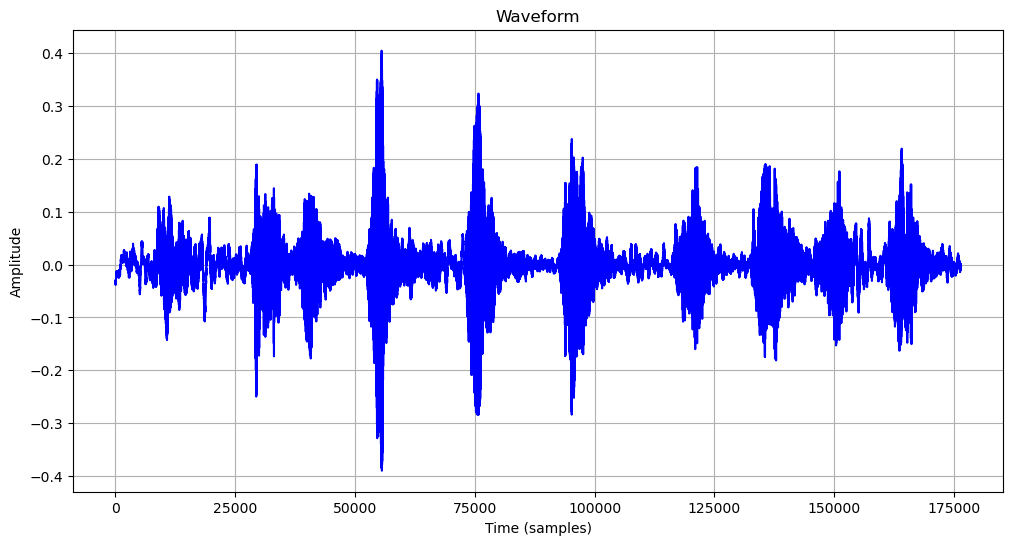

In [20]:
#obter duração do audio
duration = lr.get_duration(y=y, sr=sr)
print("Duração:", duration, "segundos")

#plot do audio no atraves do librosa
plt.figure(figsize=(12, 6))
plt.plot(y, color='blue')
plt.title('Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid()

#guardar imagem e mostrar
save_dir = os.path.join(imgs_dir, "waveform.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 3.1 Features 2D

###### Spectrogram
Representação visual do espetro de frequências num sinal ao longo do tempo.

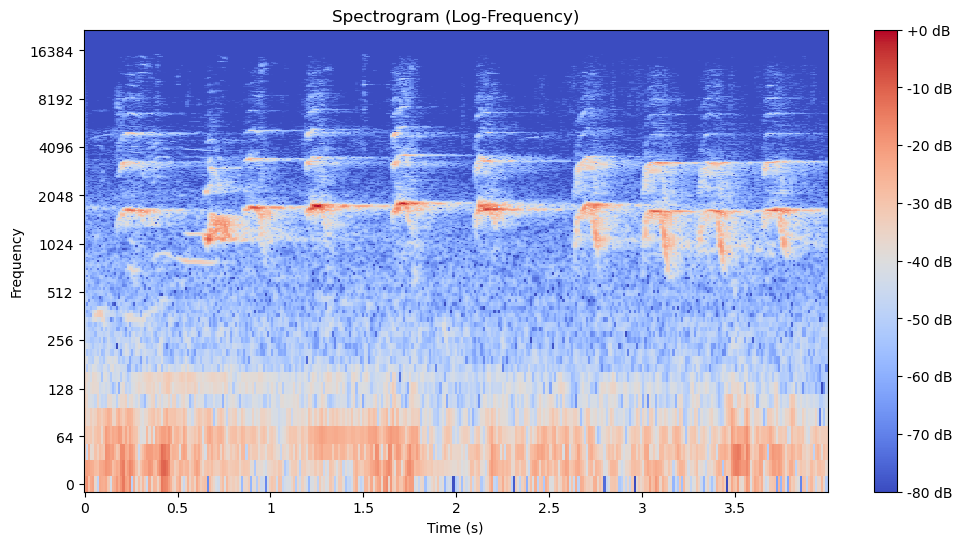

In [21]:
#obter spectrogram
raw_spectrogram = lr.stft(y)
spectrogram = lr.amplitude_to_db(np.abs(raw_spectrogram), ref=np.max)

#plot spectogram
plt.figure(figsize=(12, 6))
lr.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log-Frequency)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "spectrogram.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###### Mel-Spectrogram

Tipo de spectrogram que representa o conteúdo de frequências de um sinal na escala de Mel (replica a forma que os humanos percecionam o som, dando enfâse a frequências mais baixas e menos importância a frquências mais altas).

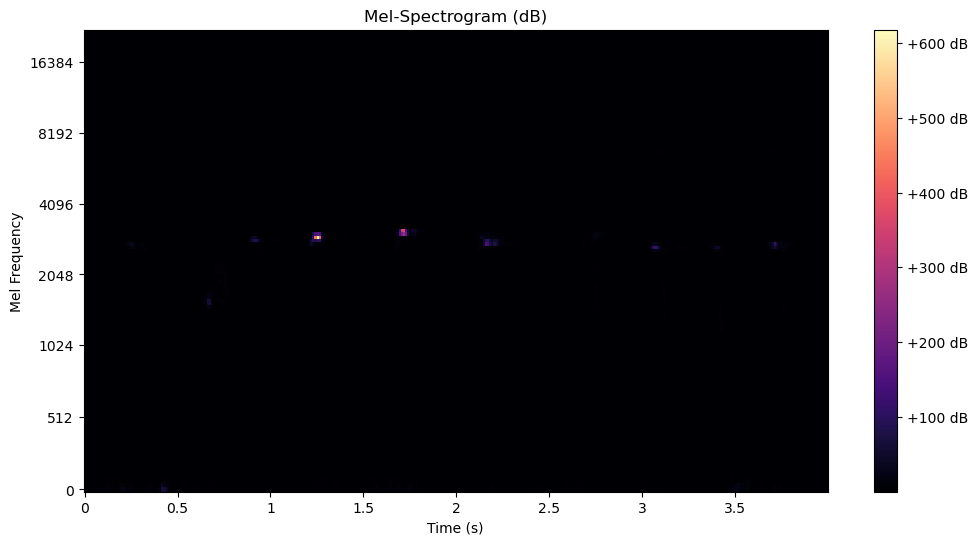

In [22]:
#obter Mel-spectogram
mel_spectrogram = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

#plot Mel-spectrogram
plt.figure(figsize=(12, 6))
lr.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram (dB)")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "mel_spectrogram.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [32]:
mel_spectrogram.shape

(128, 345)

###### Log Mel-Spectrogram

Mel-Spectrogram com transformação logarítmica aplicada, comprimindo o range de amplitudes. Torna-se mais manuseável e legível. 

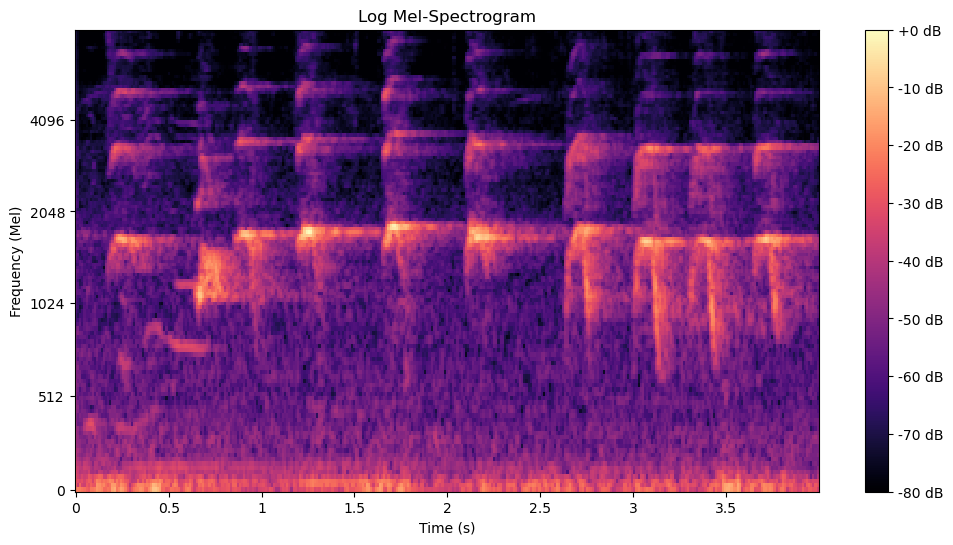

In [23]:
#obter o log mel spectrogram
log_mel_spectrogram = lr.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Log Mel-spectrogram
plt.figure(figsize=(12, 6))
lr.display.specshow(log_mel_spectrogram, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Mel)')

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "log_mel_spectrogram.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###### Mel Frequency Cepstral Coefficients (MFCCs)

Aplicam a escala de Mel e análise cepstral ao espetro do audio. Sumarizam as propriedades espectrais de um som, de forma compacta e inspirada na forma que o humano perceciona os sons.

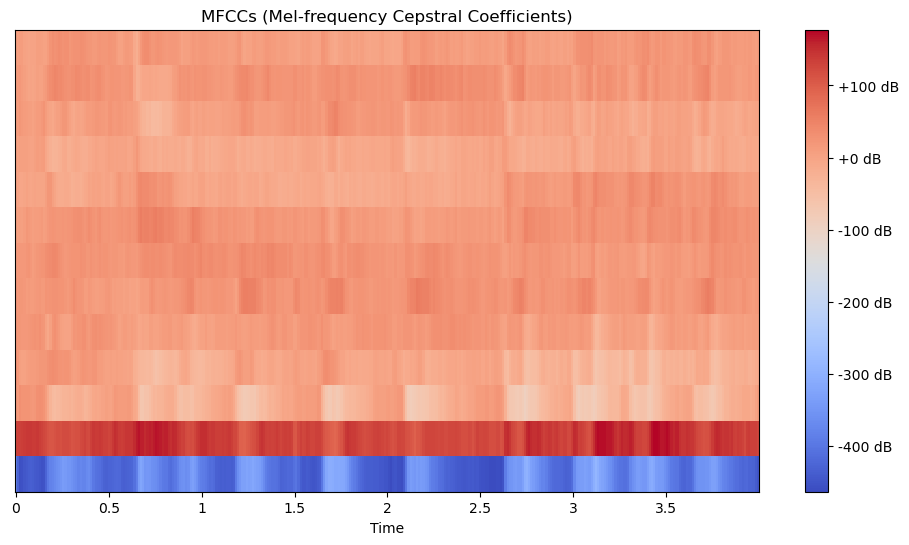

In [24]:
#MFCCS
mfccs = lr.feature.mfcc(y=y, sr=sr, n_mfcc=13)

#plot MFCCs
plt.figure(figsize=(12, 6))
lr.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs (Mel-frequency Cepstral Coefficients)')

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "mfccs.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###### Chromagram

Representa a distribuição da energia do audio sobre 12 classes de pitch (chromatic scale) em cada frame do audio.

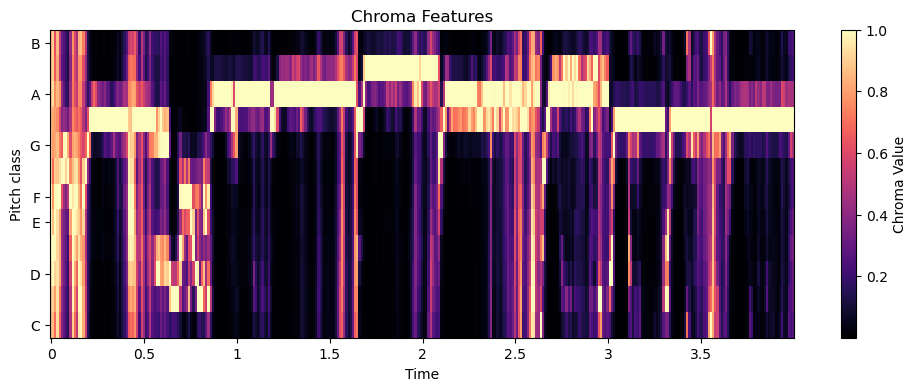

In [25]:
#obter chroma features
chroma = lr.feature.chroma_stft(y=y, sr=sr)

#plot chroma features
plt.figure(figsize=(12, 4))
lr.display.specshow(chroma, x_axis='time', sr=sr, y_axis='chroma')
plt.colorbar(label='Chroma Value')
plt.title('Chroma Features')

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "chromagram.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###### Fourier Tempogram

Representação ritmica dos conteúdos de um audio, podendo ser usado para analisar tempo e periodicidade.

/home/miguel/anaconda3/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=384 is too large for input signal of length=345
  warnings.warn(
/tmp/ipykernel_2590/3248868649.py:6: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lr.display.specshow(tempogram, x_axis='time', sr=sr, cmap='coolwarm')


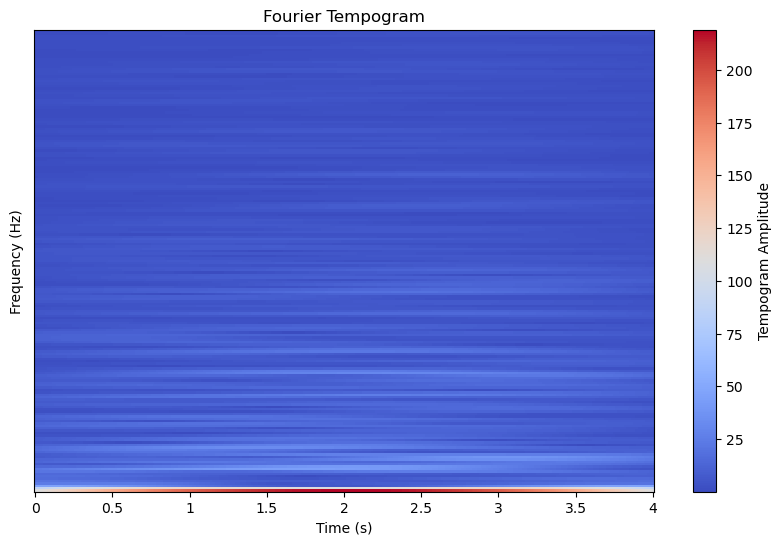

In [26]:
#obter Fourier Tempogram
tempogram = lr.feature.fourier_tempogram(y=y, sr=sr)

#plot tempogram
plt.figure(figsize=(10, 6))
lr.display.specshow(tempogram, x_axis='time', sr=sr, cmap='coolwarm')
plt.colorbar(label='Tempogram Amplitude')
plt.title('Fourier Tempogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "fourier_tempogram.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 3.2 Features 1D

###### Spectral Features

Categoria abrangente de features derivadas do dominínio da frequência de um audio. Oferecem informação relativa às características da tonalidade, harmonia e tempo. Vamos analisar:
- Spectral Centroid (onde mais energia se concentra, valores altos traduzem sons mais "claros");
- Spectral Bandwidth (mede a largura à volta do spectral centroid);
- Spectral Flatness (indica quão "liso" o espectro é, ou seja, se o som é tone-like ou noise-like);
- Spectral Rolloff (frequência a baixo da qual uma percentagem especificada da energia total espectral está contida).

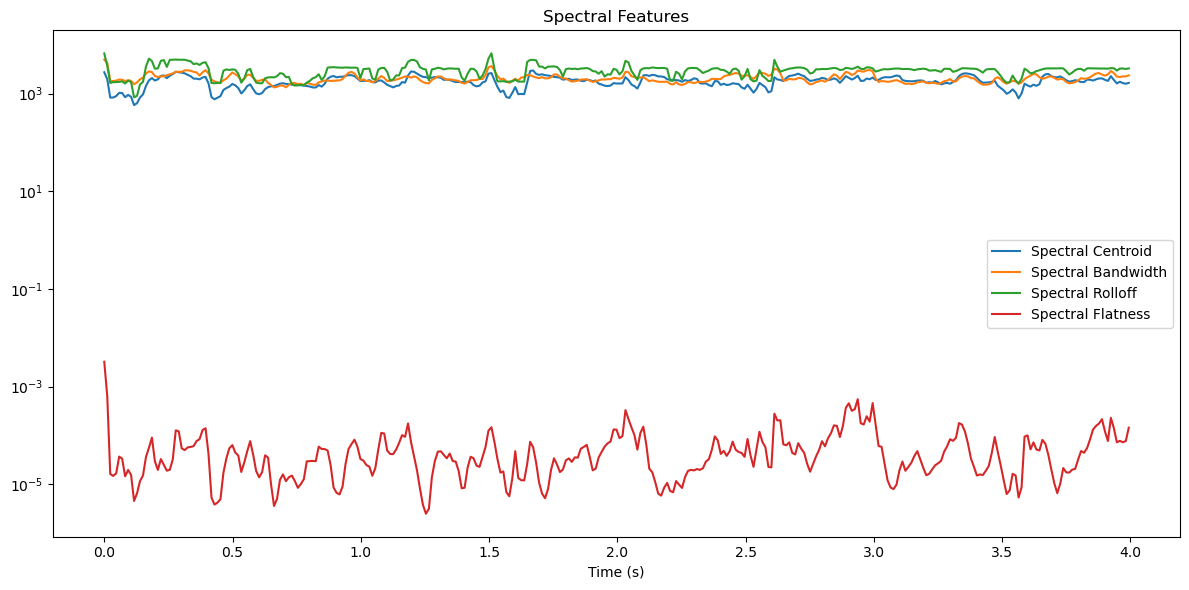

In [27]:
#obter spectral features
spectral_centroid = lr.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = lr.feature.spectral_bandwidth(y=y, sr=sr)
spectral_flatness = lr.feature.spectral_flatness(y=y)
spectral_rolloff = lr.feature.spectral_rolloff(y=y, sr=sr)

#plot waveform and features
plt.figure(figsize=(12, 6))
frames = range(spectral_centroid.shape[1])
times = lr.frames_to_time(frames, sr=sr)
plt.semilogy(times, spectral_centroid[0], label='Spectral Centroid')
plt.semilogy(times, spectral_bandwidth[0], label='Spectral Bandwidth')
plt.semilogy(times, spectral_rolloff[0], label='Spectral Rolloff')
plt.plot(times, spectral_flatness[0], label='Spectral Flatness')
plt.xlabel('Time (s)')
plt.legend()
plt.title('Spectral Features')
plt.tight_layout()

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "spectral_features.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###### Zero Crossing Rate e Root Mean Square Energy (RMS)

ZCR ajuda a distinguir sons percursivos (tambores) de sons tonais (cantar), enquando que rms ajuda a quantificar o barulho ou volume de um audio.

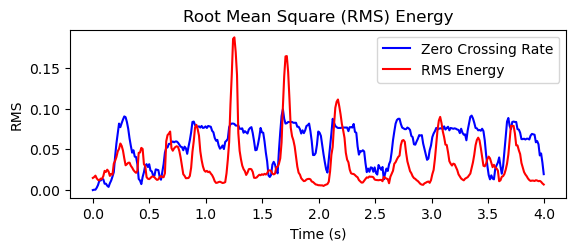

In [28]:
#obter zcr e rms
zcr = lr.feature.zero_crossing_rate(y=y)
rms = lr.feature.rms(y=y)

#plot zcr
plt.subplot(2, 1, 1)
plt.plot(times, zcr[0], label='Zero Crossing Rate', color='b')
plt.xlabel('Time (s)')
plt.ylabel('ZCR')
plt.title('Zero Crossing Rate')
plt.legend(loc='upper right')
#plot rms
plt.subplot(2, 1, 1)
plt.plot(times, rms[0], label='RMS Energy', color='r')
plt.xlabel('Time (s)')
plt.ylabel('RMS')
plt.title('Root Mean Square (RMS) Energy')
plt.legend(loc='upper right')

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "zcr_rms.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###### Onsets

Deteta os pontos num audio onde começam eventos (por norma correspondem ao início de notas musicais).

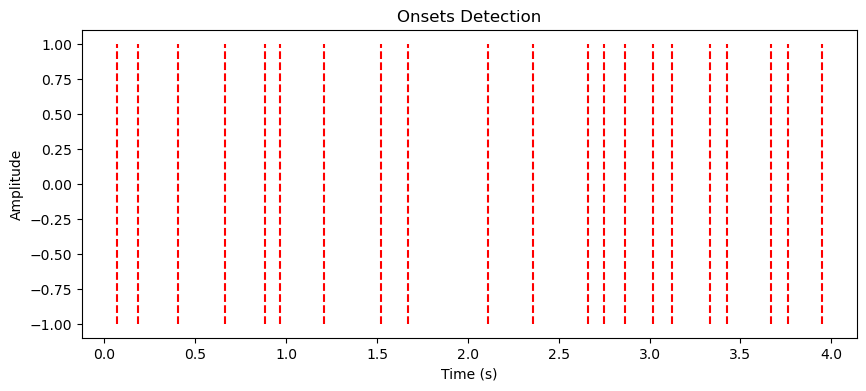

In [29]:
#obter onsets
onset_frames = lr.onset.onset_detect(y=y, sr=sr)
onset_times = lr.frames_to_time(onset_frames, sr=sr)

#criar plot
plt.figure(figsize=(10, 4))
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')
plt.title('Onsets Detection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "onsets.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###### Tempo e Beats

Mede a velocidade do audio em batidas por minutos (BPMs).

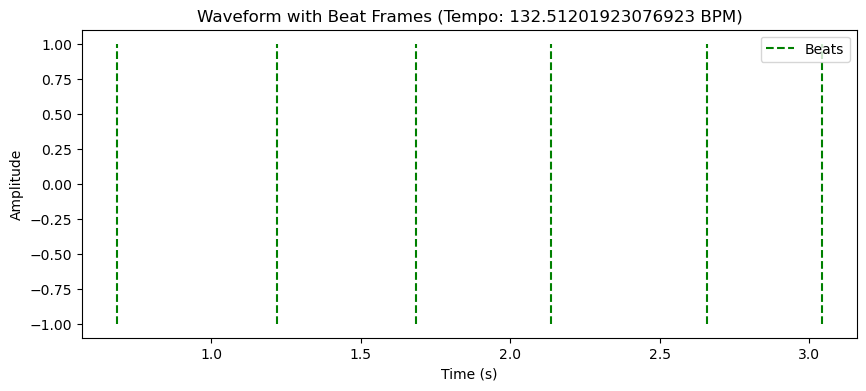

In [30]:
#tempo estimado
tempo, beat_frames = lr.beat.beat_track(y=y, sr=sr)
beat_times = lr.frames_to_time(beat_frames, sr=sr)

#plot beat times
plt.figure(figsize=(10, 4))
plt.vlines(beat_times, ymin=-1, ymax=1, color='g', linestyle='--', label='Beats')
plt.title(f'Waveform with Beat Frames (Tempo: {tempo[0]} BPM)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

#guardar a imagem e mostrar
save_dir = os.path.join(imgs_dir, "tempo_beats.jpg")
#plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 

# 4. Seleção dos Modelos

Para este trabalho, foi dada a escolha de dois classificadores entre três propostos, sendo eles:<br>
 - um classificador baseado num Multilayer Perceptron (MLP);
 - um classificador baseado numa Convultional Neural Network (CNN);
 - um classificador baseado numa Recurrent Neural Network (RNN).

Após a nossa análise geral das features que podem ser extraídas, torna-se óbvia a separação destas em 2 grandes categorias: features 2D e features 1D.<br>
Assim sendo, surgiu a curiosidade de descobrir como é que dois modelos, cada um baseado num tipo de feature (2D e 1D), diferiam nas suas performances. Uma vez que nos foi dada a oportunidade de implementar um modelo mais focado em features 1D através da sua operação com base em inputs vetorizados/flattened (MLP), e a oportunidade de implementar um modelo bem capaz de manusear dados de duas dimensões(CNN); a nossa escolha tornou-se clara.

Com a nossa escolha feita, e ainda sem ter implementado nenhum dos modelos, podemos tentar fazer uma previsão que, devido às limitações do modelo MLP, e devido à vantagem de processamento de dados 2D do CNN, este segundo modelo obterá melhores resultados se for bem implementado.<br>
Todavia, o nosso objetivo é desenvolver dois modelos bem robustos e com bons resultados, logo, esperaremos que os dois tenham um desempenho igualmente bom!

TL;DR - os modelos escolhidos foram MLP e CNN.